# 데이터 시각화 
- https://data.seoul.go.kr/dataList/373/S/2/datasetView.do
- 서울시 폐기물 재활용 현황 통계 (2019년)

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# minus 표시
mpl.rcParams['axes.unicode_minus']=False
plt.rc('font',family='NanumBarunGothic')

In [2]:
df = pd.read_excel('Report.xls')

In [3]:
df.head()

,기간,자치구별,합계,합계.1,생활폐기물,생활폐기물.1,음식물폐기물,음식물폐기물.1,사업장배출 시설계폐기물,사업장배출 시설계폐기물.1,건설폐기물,건설폐기물.1,지정폐기물,지정폐기물.1
0,기간,자치구별,발생량,재활용량,발생량,재활용량,발생량,재활용량,발생량,재활용량,발생량,재활용량,발생량,재활용량
1,2019,합계,47642.9,42161,7041.1,3729.3,2806.3,2806.1,2303,932.6,35492.5,34693,352.9,74.6
2,2019,종로구,860.1,728,244.8,124.5,95.1,95.1,0.6,0.2,519.6,508.2,21.9,7.3
3,2019,중구,1459.8,1265.6,325.9,136.5,87.8,87.8,0.4,0.1,1045.7,1041.2,8.4,2.4
4,2019,용산구,1137.4,1008.5,234.4,127.8,70.8,70.8,11,7.4,821.2,802.5,3.4,1.1


In [4]:
df_total = df.loc[[0,1]]
df_total

,기간,자치구별,합계,합계.1,생활폐기물,생활폐기물.1,음식물폐기물,음식물폐기물.1,사업장배출 시설계폐기물,사업장배출 시설계폐기물.1,건설폐기물,건설폐기물.1,지정폐기물,지정폐기물.1
0,기간,자치구별,발생량,재활용량,발생량,재활용량,발생량,재활용량,발생량,재활용량,발생량,재활용량,발생량,재활용량
1,2019,합계,47642.9,42161,7041.1,3729.3,2806.3,2806.1,2303,932.6,35492.5,34693,352.9,74.6


In [5]:
df_total.columns = df_total.columns + df_total.loc[0]
df_total = df_total.drop(0)

In [6]:
df_total

,기간기간,자치구별자치구별,합계발생량,합계.1재활용량,생활폐기물발생량,생활폐기물.1재활용량,음식물폐기물발생량,음식물폐기물.1재활용량,사업장배출 시설계폐기물발생량,사업장배출 시설계폐기물.1재활용량,건설폐기물발생량,건설폐기물.1재활용량,지정폐기물발생량,지정폐기물.1재활용량
1,2019,합계,47642.9,42161,7041.1,3729.3,2806.3,2806.1,2303,932.6,35492.5,34693,352.9,74.6


In [7]:
df_total.columns = ['기간', '자치구별', '총발생량', '총재활용량', '생활폐기물발생량', '생활폐기물재활용량',
       '음식물폐기물발생량', '음식물폐기물재활용량', '사업장배출 시설계폐기물발생량', '사업장배출 시설계폐기물재활용량',
       '건설폐기물발생량', '건설폐기물재활용량', '지정폐기물발생량', '지정폐기물재활용량']

In [8]:
df_total = df_total.T
df_total= df_total.drop(['기간', '자치구별'])
df_total.columns = ['발생량']

In [9]:
df_total

,발생량
총발생량,47642.9
총재활용량,42161
생활폐기물발생량,7041.1
생활폐기물재활용량,3729.3
음식물폐기물발생량,2806.3
음식물폐기물재활용량,2806.1
사업장배출 시설계폐기물발생량,2303
사업장배출 시설계폐기물재활용량,932.6
건설폐기물발생량,35492.5
건설폐기물재활용량,34693


In [10]:
df_total['항목별발생비율'] = [ df_total['발생량'][i] / df_total['발생량'][0]  for i in df_total.index]
df_total

,발생량,항목별발생비율
총발생량,47642.9,1.000000
총재활용량,42161,0.884938
생활폐기물발생량,7041.1,0.147789
생활폐기물재활용량,3729.3,0.078276
음식물폐기물발생량,2806.3,0.058903
음식물폐기물재활용량,2806.1,0.058899
사업장배출 시설계폐기물발생량,2303,0.048339
사업장배출 시설계폐기물재활용량,932.6,0.019575
건설폐기물발생량,35492.5,0.744969
건설폐기물재활용량,34693,0.728188


In [15]:
df_t = df_total.T
df_t = df_t[['생활폐기물발생량', '음식물폐기물발생량', '사업장배출 시설계폐기물발생량', '건설폐기물발생량', '지정폐기물발생량']]
df_t = df_t.T
df_t

,발생량,항목별발생비율
생활폐기물발생량,7041.1,0.147789
음식물폐기물발생량,2806.3,0.0589028
사업장배출 시설계폐기물발생량,2303,0.0483388
건설폐기물발생량,35492.5,0.744969
지정폐기물발생량,352.9,0.00740719


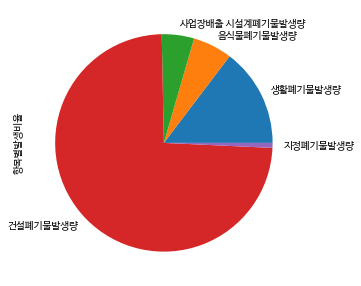

In [16]:
# 항목별 발생 비율 그래프 시각화
df_t['항목별발생비율'].plot.pie(figsize=(10,5))

In [31]:
df_rec = df_total.T
df_rec = df_rec[['총재활용량', '생활폐기물재활용량', '음식물폐기물재활용량','사업장배출 시설계폐기물재활용량', '건설폐기물재활용량','지정폐기물재활용량']]

In [32]:
df_rec = df_rec.T

In [33]:
df_rec

,발생량,항목별발생비율
총재활용량,42161,0.884938
생활폐기물재활용량,3729.3,0.0782761
음식물폐기물재활용량,2806.1,0.0588986
사업장배출 시설계폐기물재활용량,932.6,0.0195748
건설폐기물재활용량,34693,0.728188
지정폐기물재활용량,74.6,0.00156582


In [34]:
df_rec['재활용비율'] = [ df_rec['발생량'].loc[i]/df_rec['발생량'][0] for i in df_rec.index ]
df_rec

,발생량,항목별발생비율,재활용비율
총재활용량,42161,0.884938,1.000000
생활폐기물재활용량,3729.3,0.0782761,0.088454
음식물폐기물재활용량,2806.1,0.0588986,0.066557
사업장배출 시설계폐기물재활용량,932.6,0.0195748,0.022120
건설폐기물재활용량,34693,0.728188,0.822869
지정폐기물재활용량,74.6,0.00156582,0.001769


In [35]:
df_rec1= df_rec.drop('총재활용량')
df_rec1

,발생량,항목별발생비율,재활용비율
생활폐기물재활용량,3729.3,0.0782761,0.088454
음식물폐기물재활용량,2806.1,0.0588986,0.066557
사업장배출 시설계폐기물재활용량,932.6,0.0195748,0.022120
건설폐기물재활용량,34693,0.728188,0.822869
지정폐기물재활용량,74.6,0.00156582,0.001769


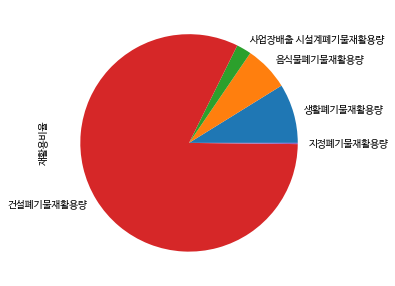

In [37]:
# 항목별 재활용 비율 시각화 
df_rec1['재활용비율'].plot.pie(figsize=(10,5))

In [42]:
# 생활폐기물 재활용량 
df_total['발생량'][3]/df_total['발생량'][2]

0.5296473562369516